In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1C72k2HGGAtRQVkXIqh6xpyzd1jVXAvT6' -O Apple.csv

--2024-02-20 14:25:37--  https://docs.google.com/uc?export=download&id=1C72k2HGGAtRQVkXIqh6xpyzd1jVXAvT6
Resolving docs.google.com (docs.google.com)... 74.125.135.113, 74.125.135.100, 74.125.135.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.135.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1C72k2HGGAtRQVkXIqh6xpyzd1jVXAvT6&export=download [following]
--2024-02-20 14:25:37--  https://drive.usercontent.google.com/download?id=1C72k2HGGAtRQVkXIqh6xpyzd1jVXAvT6&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.98.132, 2607:f8b0:400e:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327902 (320K) [application/octet-stream]
Saving to: ‘Apple.csv’

Apple.csv           100%[===================>] 320.22K  --.-KB/s    in 0.00

In [ ]:
RAND_STATE = 28

### Preprocessing

In [ ]:
data = pd.read_csv("Apple.csv")
df = data[data['region'] == 'UK']
df.drop(columns=["Unnamed: 0", "region"], inplace=True)

df = df.reset_index(drop=True)

df['type'] = pd.factorize(df['type'])[0]

<ipython-input-178-8e16e66f685b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Unnamed: 0", "region"], inplace=True)


In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by=['Date'])

# Extract year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
conventional_envi = df[df['type'] == 0][['Date', 'Envi']]
organic_envi = df[df['type'] == 1][['Date', 'Envi']]

conventional_fuji = df[df['type'] == 0][['Date', 'Fuji']]
organic_fuji = df[df['type'] == 1][['Date', 'Fuji']]

conventional_gala = df[df['type'] == 0][['Date', 'Gala']]
organic_gala = df[df['type'] == 1][['Date', 'Gala']]

### Visualization

### Linear Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.09188864152075693


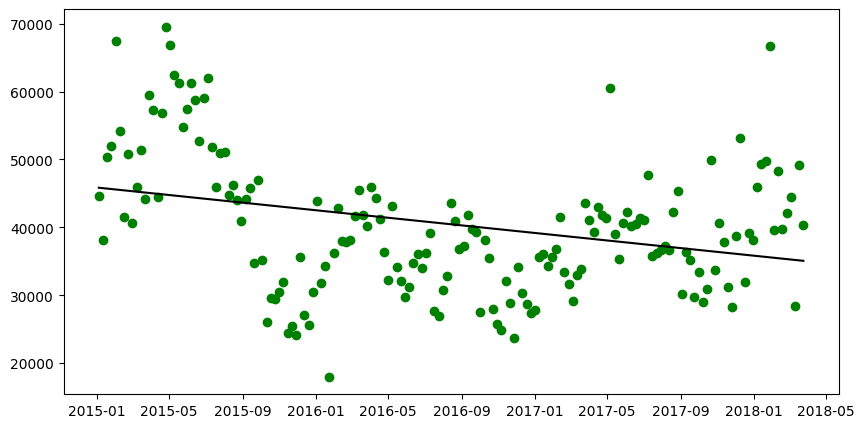

In [ ]:
# Conventional Envi
X = conventional_envi.drop('Envi', axis=1)
y = conventional_envi.Envi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X, model.predict(np.array(X).astype(np.float64)), color='k')

print(model.score(np.array(X).astype(np.float64), y))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.3842016655712346


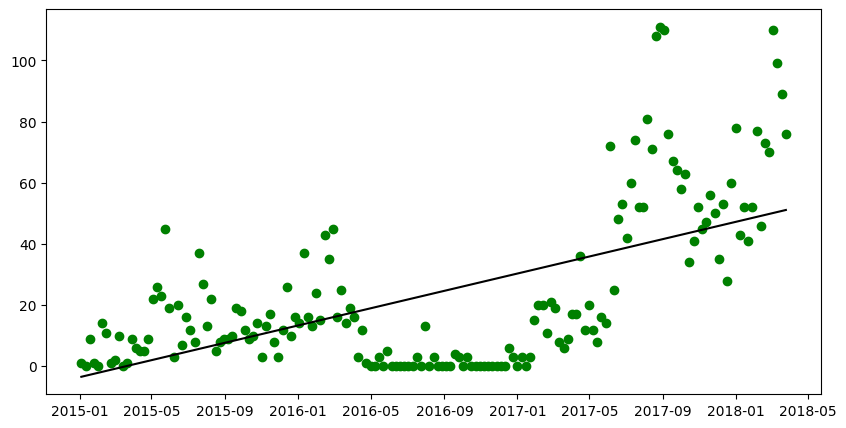

In [ ]:
# Organic Envi
X = organic_envi.drop('Envi', axis=1)
y = organic_envi.Envi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X, model.predict(np.array(X).astype(np.float64)), color='k')

print(model.score(np.array(X).astype(np.float64), y))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.28957847168416373


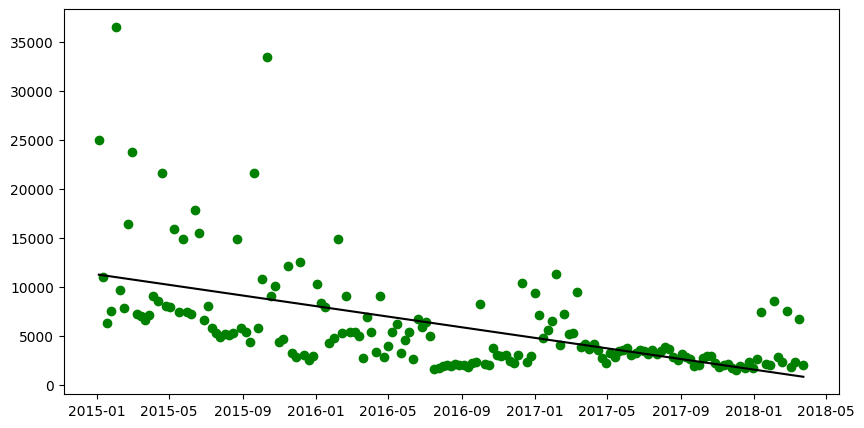

In [ ]:
# Conventional Fuji
X = conventional_fuji.drop('Fuji', axis=1)
y = conventional_fuji.Fuji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X, model.predict(np.array(X).astype(np.float64)), color='k')

print(model.score(np.array(X).astype(np.float64), y))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.22440820017185426


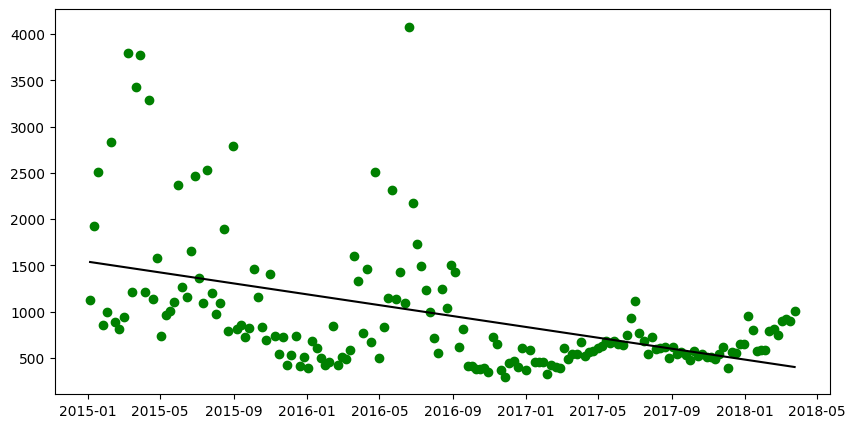

In [ ]:
# Organic Fuji
X = organic_fuji.drop('Fuji', axis=1)
y = organic_fuji.Fuji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X, model.predict(np.array(X).astype(np.float64)), color='k')

print(model.score(np.array(X).astype(np.float64), y))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.12354674309599367


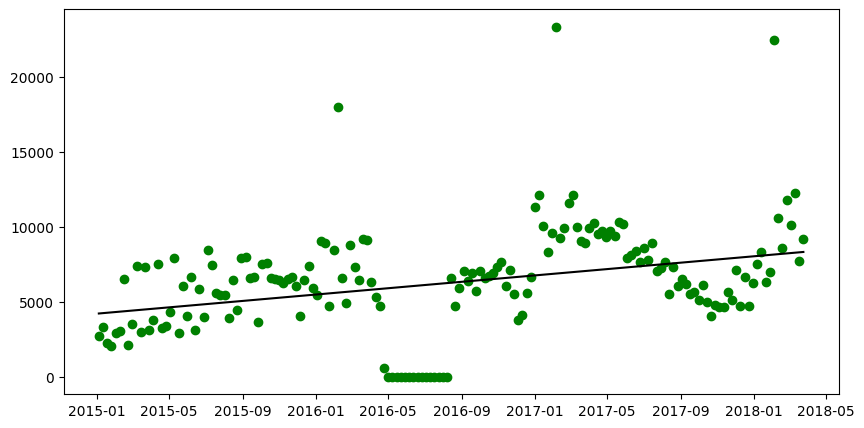

In [ ]:
# Conventional Gala
X = conventional_gala.drop('Gala', axis=1)
y = conventional_gala.Gala

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X, model.predict(np.array(X).astype(np.float64)), color='k')

print(model.score(np.array(X).astype(np.float64), y))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.015197305056504073


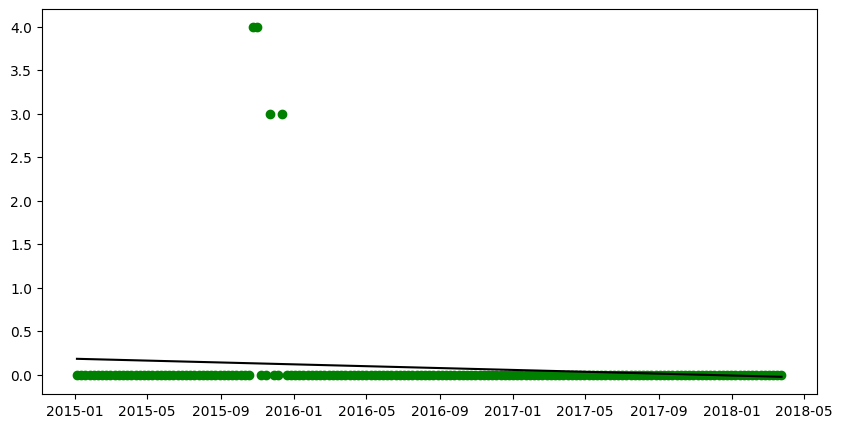

In [ ]:
# Organic Gala
X = organic_gala.drop('Gala', axis=1)
y = organic_gala.Gala

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X, model.predict(np.array(X).astype(np.float64)), color='k')

print(model.score(np.array(X).astype(np.float64), y))
plt.show()

### Lasso Algorithm


### Ridge Algorithm


## Decision tree regressor

## Gradient Boosting regressor

### Validation